# Home Work #1

It is needed to work with the data on the biomechanical features of orthopedic patients.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA

In [ ]:
# At first, let's set the precision for values: to 2 digits after the decimal point. Оставим вывод только двух чисел после запятой
pd.set_option("precision", 2)

## Step 1: Introduction (Data Table)

In [ ]:
# Load the data from column_2C_weka.csv
data = pd.read_csv("column_2C_weka_moda_hw1.csv")
data

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,jump_height,class
0,63.03,22.55,39.61,40.48,98.67,-0.25,34.56,Abnormal
1,49.71,9.65,28.32,40.06,108.17,7.92,10.03,Abnormal
2,NaN,13.92,25.12,26.33,130.33,2.23,NaN,Abnormal
3,53.43,15.86,37.17,37.57,120.57,5.99,31.68,Abnormal
4,44.32,12.54,36.10,31.78,124.12,5.42,NaN,Abnormal
...,...,...,...,...,...,...,...,...
220,47.90,13.62,36.00,34.29,117.45,-4.25,33.22,Normal
221,53.94,20.72,29.22,33.22,114.37,-0.42,NaN,Normal
222,61.45,22.69,46.17,38.75,125.67,-2.71,NaN,Normal
223,45.25,8.69,41.58,36.56,118.55,0.21,NaN,Normal


In [ ]:
# table size
data.shape

(225, 8)

In [ ]:
# features
data.columns

Index(['pelvic_incidence', 'pelvic_tilt numeric', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis',
       'jump_height', 'class'],
      dtype='object')

In [ ]:
# the first several (5) rows of the table
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,jump_height,class
0,63.03,22.55,39.61,40.48,98.67,-0.25,34.56,Abnormal
1,49.71,9.65,28.32,40.06,108.17,7.92,10.03,Abnormal
2,NaN,13.92,25.12,26.33,130.33,2.23,NaN,Abnormal
3,53.43,15.86,37.17,37.57,120.57,5.99,31.68,Abnormal
4,44.32,12.54,36.10,31.78,124.12,5.42,NaN,Abnormal


In [ ]:
# Choose randomly individual samples set with the size of 200 that is going to be processed after
sample = data.sample(n = 200, random_state = 42)

## Step 2: Zero values presence detection


In [ ]:
# sample content (relative to non-zero values)
sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 9 to 129
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          197 non-null    float64
 1   pelvic_tilt numeric       197 non-null    float64
 2   lumbar_lordosis_angle     198 non-null    float64
 3   sacral_slope              197 non-null    float64
 4   pelvic_radius             197 non-null    float64
 5   degree_spondylolisthesis  197 non-null    float64
 6   jump_height               16 non-null     float64
 7   class                     200 non-null    object 
dtypes: float64(7), object(1)
memory usage: 14.1+ KB


In [ ]:
# which column sticks out strongly?
# r: jump_height (16 non-null values out of 225)

In [ ]:
# the first several (5) rows of the table that correspond to zero values (null) in the jump_height column
sample[sample["jump_height"].isnull()].head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,jump_height,class
9,43.92,14.18,37.83,29.74,134.46,6.45,NaN,Abnormal
184,37.14,16.48,24.00,20.66,125.01,7.37,NaN,Normal
120,63.36,20.02,67.50,43.34,131.00,37.56,NaN,Abnormal
207,34.76,2.63,29.50,32.12,127.14,-0.46,NaN,Normal
148,40.68,9.15,31.02,31.53,139.12,-2.51,NaN,Normal


In [ ]:
# is this column (jump_height) informative?
# r: no, there are lots of missing values in the column

In [ ]:
# if it isn't, it would be nice to drop it
sample = sample.drop(["jump_height"], axis = 1)

In [ ]:
# Let's look at any column that contains zero values
sample.info()
# for example, sacral_slope column

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 9 to 129
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          197 non-null    float64
 1   pelvic_tilt numeric       197 non-null    float64
 2   lumbar_lordosis_angle     198 non-null    float64
 3   sacral_slope              197 non-null    float64
 4   pelvic_radius             197 non-null    float64
 5   degree_spondylolisthesis  197 non-null    float64
 6   class                     200 non-null    object 
dtypes: float64(6), object(1)
memory usage: 12.5+ KB


In [ ]:
sample[sample["sacral_slope"].isnull()]

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
45,49.78,6.47,53.00,NaN,110.86,25.34,Abnormal
6,31.28,3.14,32.56,NaN,129.01,3.62,Abnormal
139,89.83,22.64,90.56,NaN,100.50,3.04,Normal


In [ ]:
# Does it make sense to delete an entire row containing at least one NaN in the case of insufficient data?
# r: no; in smaller data sets, there is a steep price in removing samples. 
# some of the alternative approaches are more appropriate.

In [ ]:
# If it doesn't, what else can be done (taking into account that features are quantitative) what would work best for?
# r: data imputation (i.e. replacing missing data with substitute values).

In [ ]:
# we can replace the missing values using the ".fillna()" method.
value = sample.mean()
sample = sample.fillna(value)

In [ ]:
# where new values were retrieved from
sample.mean()

pelvic_incidence             60.53
pelvic_tilt numeric          16.12
lumbar_lordosis_angle        51.54
sacral_slope                 44.02
pelvic_radius               117.96
degree_spondylolisthesis     24.33
dtype: float64

In [ ]:
# Let's look at the content of the data relative to non-zero values now
sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 9 to 129
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          200 non-null    float64
 1   pelvic_tilt numeric       200 non-null    float64
 2   lumbar_lordosis_angle     200 non-null    float64
 3   sacral_slope              200 non-null    float64
 4   pelvic_radius             200 non-null    float64
 5   degree_spondylolisthesis  200 non-null    float64
 6   class                     200 non-null    object 
dtypes: float64(6), object(1)
memory usage: 12.5+ KB


## Step 3: Class Balance

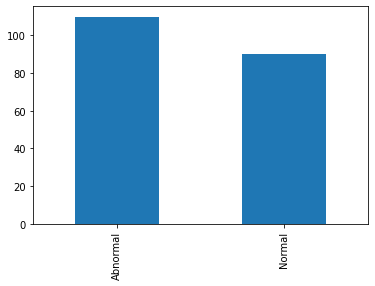

In [ ]:
# explore the balance of classes
sample["class"].value_counts().plot(kind="bar")

In [ ]:
sample["class"].value_counts() # overall, 200 samples.

Abnormal    110
Normal       90
Name: class, dtype: int64

In [ ]:
110/200 # abnormal part

0.55

In [ ]:
90/200 # normal part

0.45

In [ ]:
# as we may see, there is a slight disbalance of classes ((45/55)%. Nevertheless, it's all right.

## Step 4: Outliers

In [ ]:
sample.columns # 'jump_height', 'class' are not going to be used then - [:6]

Index(['pelvic_incidence', 'pelvic_tilt numeric', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis', 'class'],
      dtype='object')

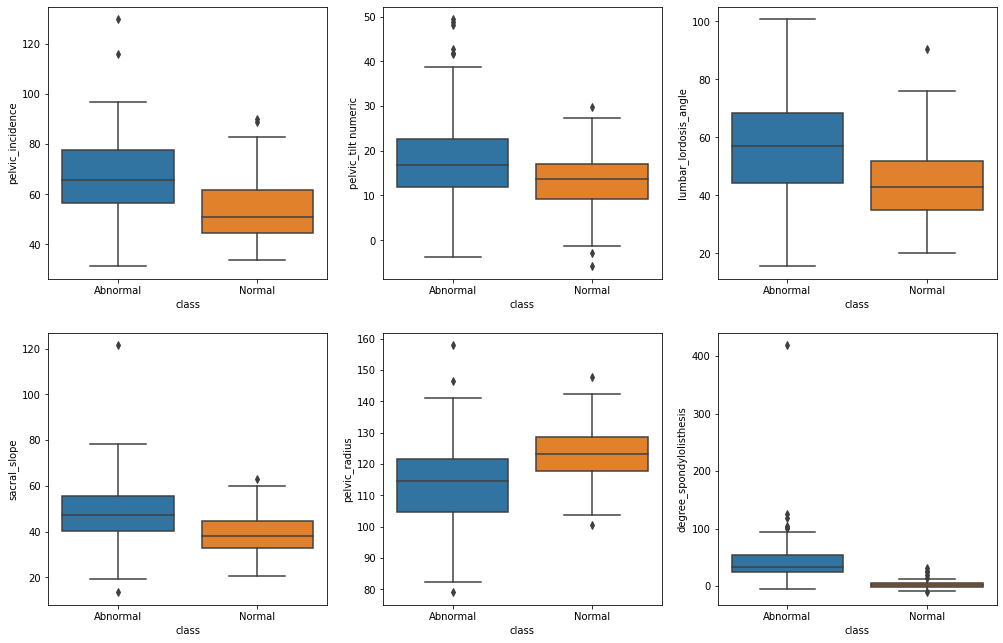

In [ ]:
# Let's explore outliers in the data
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (17, 11))

for idx, feat in enumerate(sample.columns[:6]):
    sns.boxplot(x="class", y=feat, data=sample, ax=axes[int(idx / 3), idx % 3])
    axes[int(idx / 3), idx % 3].set_xlabel("class")
    axes[int(idx / 3), idx % 3].set_ylabel(feat);

In [ ]:
# Are there any outliers in the data?
# r: yes, there are. 

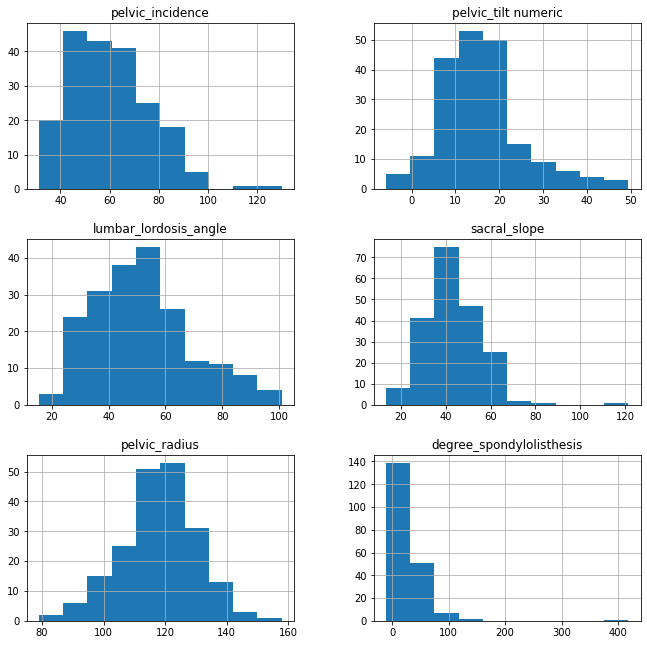

In [ ]:
# let's look at the data skewness
sample[sample.columns[:6]].hist(figsize=(11,11));

In [ ]:
# Which features have skewness?
# r: the following features have skewness:
# "degree_spondylolisthesis" (the strongest skewness)
# "pelvic_tilt numeric", "lumbar_lordosis_angle", "pelvic_radius" (the normal/slight skewness).

In [ ]:
# Do a boxplot and a histogram for a feature fit together (matching)?
# r: yes

In [ ]:
# delete outliers out of three-sigma
low = 0.01
high = 0.99
quant_data = sample.quantile([low,high]) 

# find values of lim [1% values below for low] and [1% values above for high]
quant_data

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0.01,34.38,-2.98,23.96,20.44,88.37,-8.30
0.99,96.85,48.08,93.91,77.21,146.48,118.42


In [ ]:
# delete outliers out of three-sigma
for name in list(sample.drop(labels=["class"], axis = 1).columns): # all column names except for "class"
    sample = sample[(sample[name] > quant_data.loc[low, name]) & (sample[name] < quant_data.loc[high, name])]

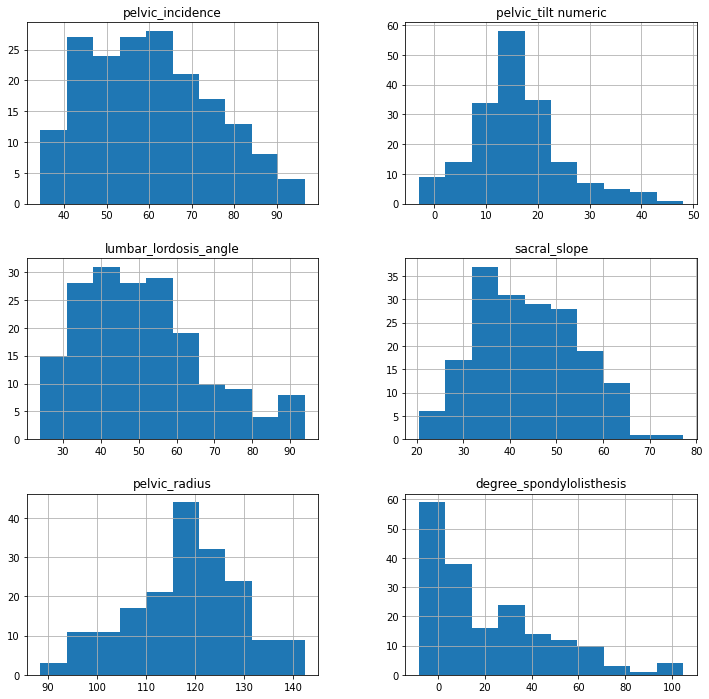

In [ ]:
# look at the data skewness now
sample[sample.columns[:6]].hist(figsize=(12,12));

## Step 5: Scale

In [ ]:
# Let's divide the dataset into X and Y ..
X = sample.drop(labels=["class"], axis=1)
Y = sample["class"]

In [ ]:
X

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
9,43.92,14.18,37.83,29.74,134.46,6.45
184,37.14,16.48,24.00,20.66,125.01,7.37
120,63.36,20.02,67.50,43.34,131.00,37.56
207,34.76,2.63,29.50,32.12,127.14,-0.46
148,40.68,9.15,31.02,31.53,139.12,-2.51
...,...,...,...,...,...,...
160,47.81,10.69,54.00,37.12,125.39,-0.40
217,54.60,21.49,29.36,33.11,118.34,24.33
187,39.36,7.01,37.00,32.35,117.82,1.90
191,51.33,13.63,33.26,37.69,131.31,1.79


In [ ]:
Y

9      Abnormal
184      Normal
120    Abnormal
207      Normal
148      Normal
         ...   
160      Normal
217      Normal
187      Normal
191      Normal
129      Normal
Name: class, Length: 181, dtype: object

In [ ]:
# .. and train & test with the 80/20 % relation
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

In [ ]:
# use Data Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_array = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_array, index=X_train.index, columns=X_train.columns)
X_test_array = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_array, index=X_test.index, columns=X_test.columns)

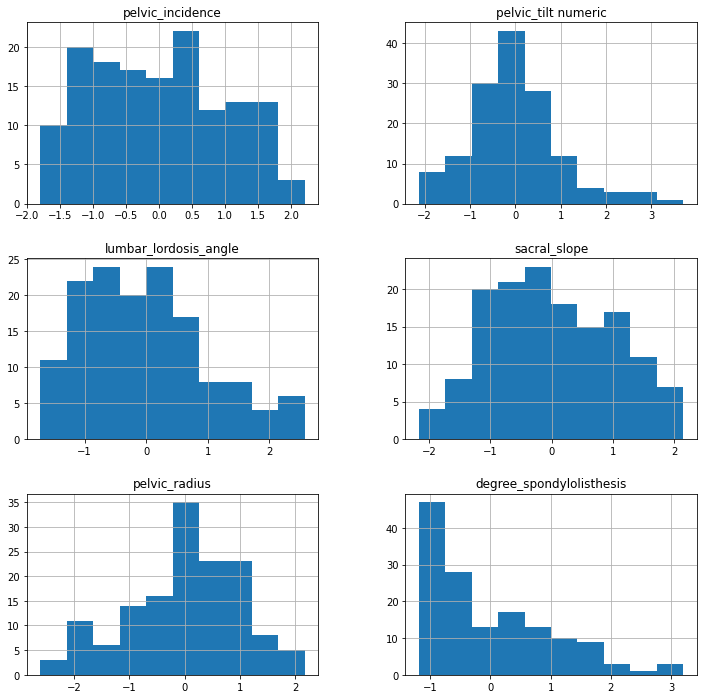

In [ ]:
# then, let's look at the histograms of features
X_train[X_train.columns[:6]].hist(figsize=(12,12));

In [ ]:
# What changed?
# r: on the histograms above we may see that the values of the x axis are changed (zero-centering of the data)
# now, the values of each feature in the data have zero-mean and unit-variance
# p.s. the distribution of the data is changed a little bit due to the reduction of 20 perc. of the initial data (the train data (80%))

## Step 6: PCA

In [ ]:
# perform PCA with six components and train it on the X_train data set
pca = PCA(n_components = 6)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
# transform PCA
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

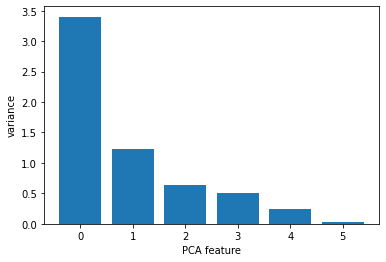

In [ ]:
# create bar plot
plt.bar(range(pca.n_components_), pca.explained_variance_)
plt.xlabel("PCA feature")
plt.ylabel("variance")
plt.show()

In [ ]:
# convert Y_train data set into the values 0,1
d = dict(zip(set(Y_train), [0,1]))
label = list()
for i in Y_train:
    label.append(d[i])

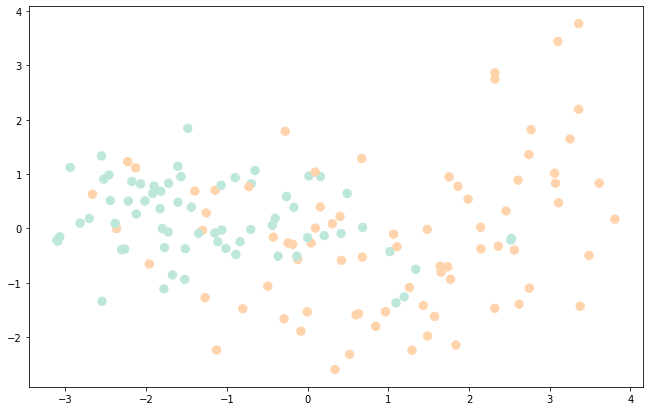

In [ ]:
# and create the plot based on the first 2 components / 1-2
plt.figure(figsize=(11,7))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=label, s=70, cmap='icefire_r') # 1 n 2 comp [:,0] [:,1]
plt.show()

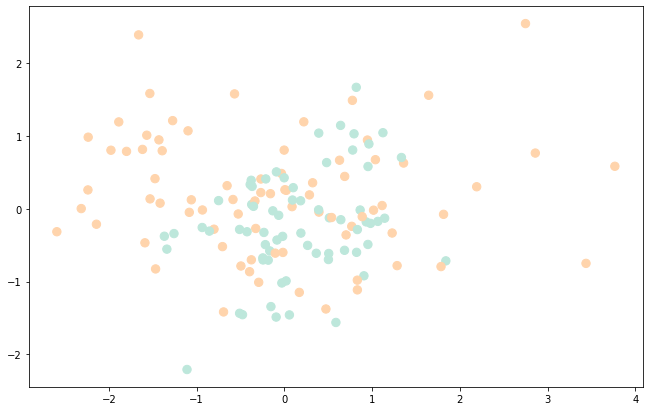

In [ ]:
# .. create the plot based on the 2nd and the 3rd components / 2-3
plt.figure(figsize=(11,7))
plt.scatter(X_train_pca[:, 1], X_train_pca[:, 2], c=label, s=70, cmap='icefire_r')
plt.show()

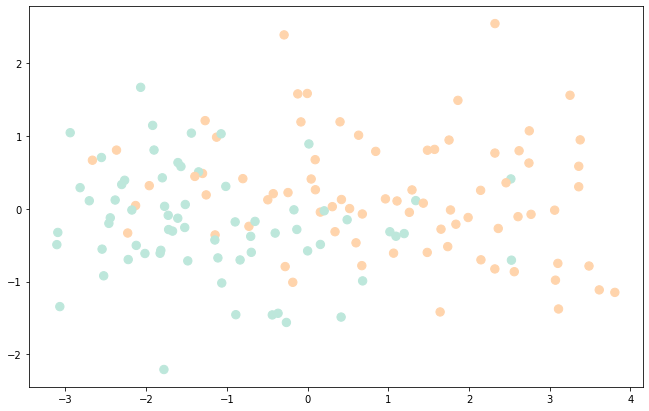

In [ ]:
# .. create the plot based on the 1st and the 3rd components / 1-3
plt.figure(figsize=(11,7))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 2], c=label, s=70, cmap='icefire_r')
plt.show()

In [ ]:
# how many components may explain >95% variance
for i in range(5):
    print( str(i) + " parameters managed to capture: " + 
    str(sum(pca.explained_variance_ratio_[:i]))[:5] + " of explained variance")

0 parameters managed to capture: 0 of explained variance
1 parameters managed to capture: 0.562 of explained variance
2 parameters managed to capture: 0.766 of explained variance
3 parameters managed to capture: 0.871 of explained variance
4 parameters managed to capture: 0.955 of explained variance
